# EARS Data Analysis - Demo Notebook

This notebook demonstrates the use of the `dolphain` package for analyzing
underwater acoustic recordings from the Gulf of Mexico.

The `dolphain` package provides:
- **`read_ears_file()`**: Read binary EARS data files
- **`plot_waveform()`**: Visualize time-domain data
- **`plot_spectrogram()`**: Visualize frequency content
- **`plot_overview()`**: Multi-panel comprehensive view
- **`print_file_info()`**: Display file metadata
- **`wavelet_denoise()`**: Denoise data using wavelet transforms

In [ ]:
# Import the dolphain package
import dolphain
from pathlib import Path
import numpy as np

%matplotlib inline

## Example 1: Quick Analysis of a .190 File

In [2]:
# Read the first sample file
file_path = Path('unophysics/sample_data/71621DC7.190')
data = ears_reader.read_ears_file(file_path)

# Display file information
ears_reader.print_file_info(data, file_path)

File: unophysics/sample_data/71621DC7.190
Recording start: 2017-06-12 06:38:38.348219
Recording end: 2017-06-12 06:38:59.681552
Duration: 21.33 seconds
Number of samples: 4,096,000
Sampling rate: 192,000 Hz


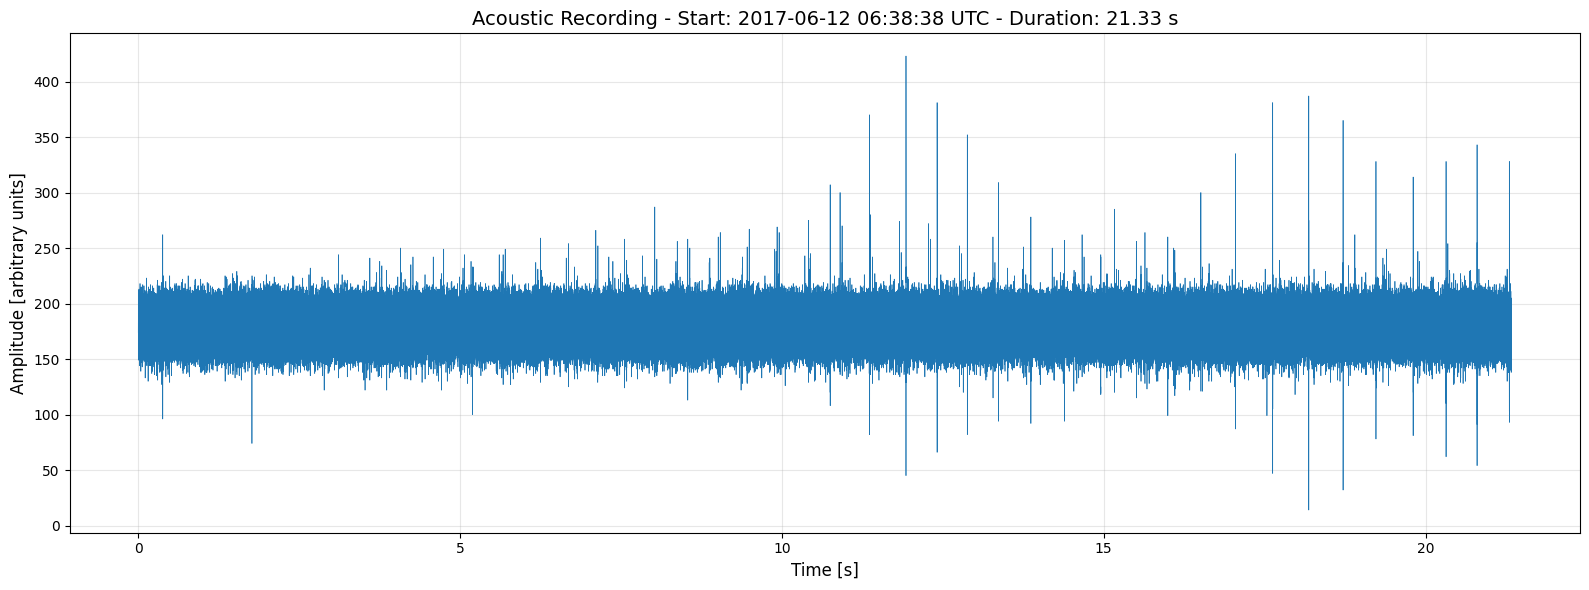

In [3]:
# Plot the waveform
ears_reader.plot_waveform(data)

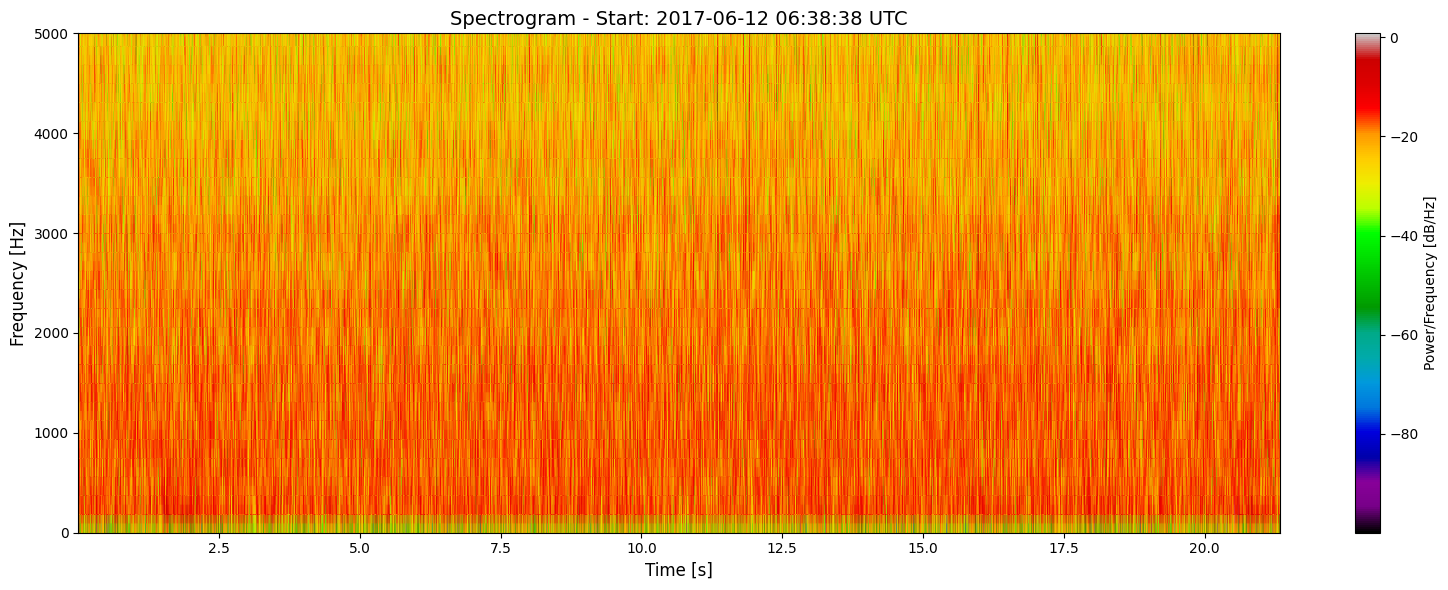

In [4]:
# Plot spectrogram (focusing on lower frequencies where biological sounds typically are)
ears_reader.plot_spectrogram(data, fmax=5000)

## Example 2: Comprehensive Overview

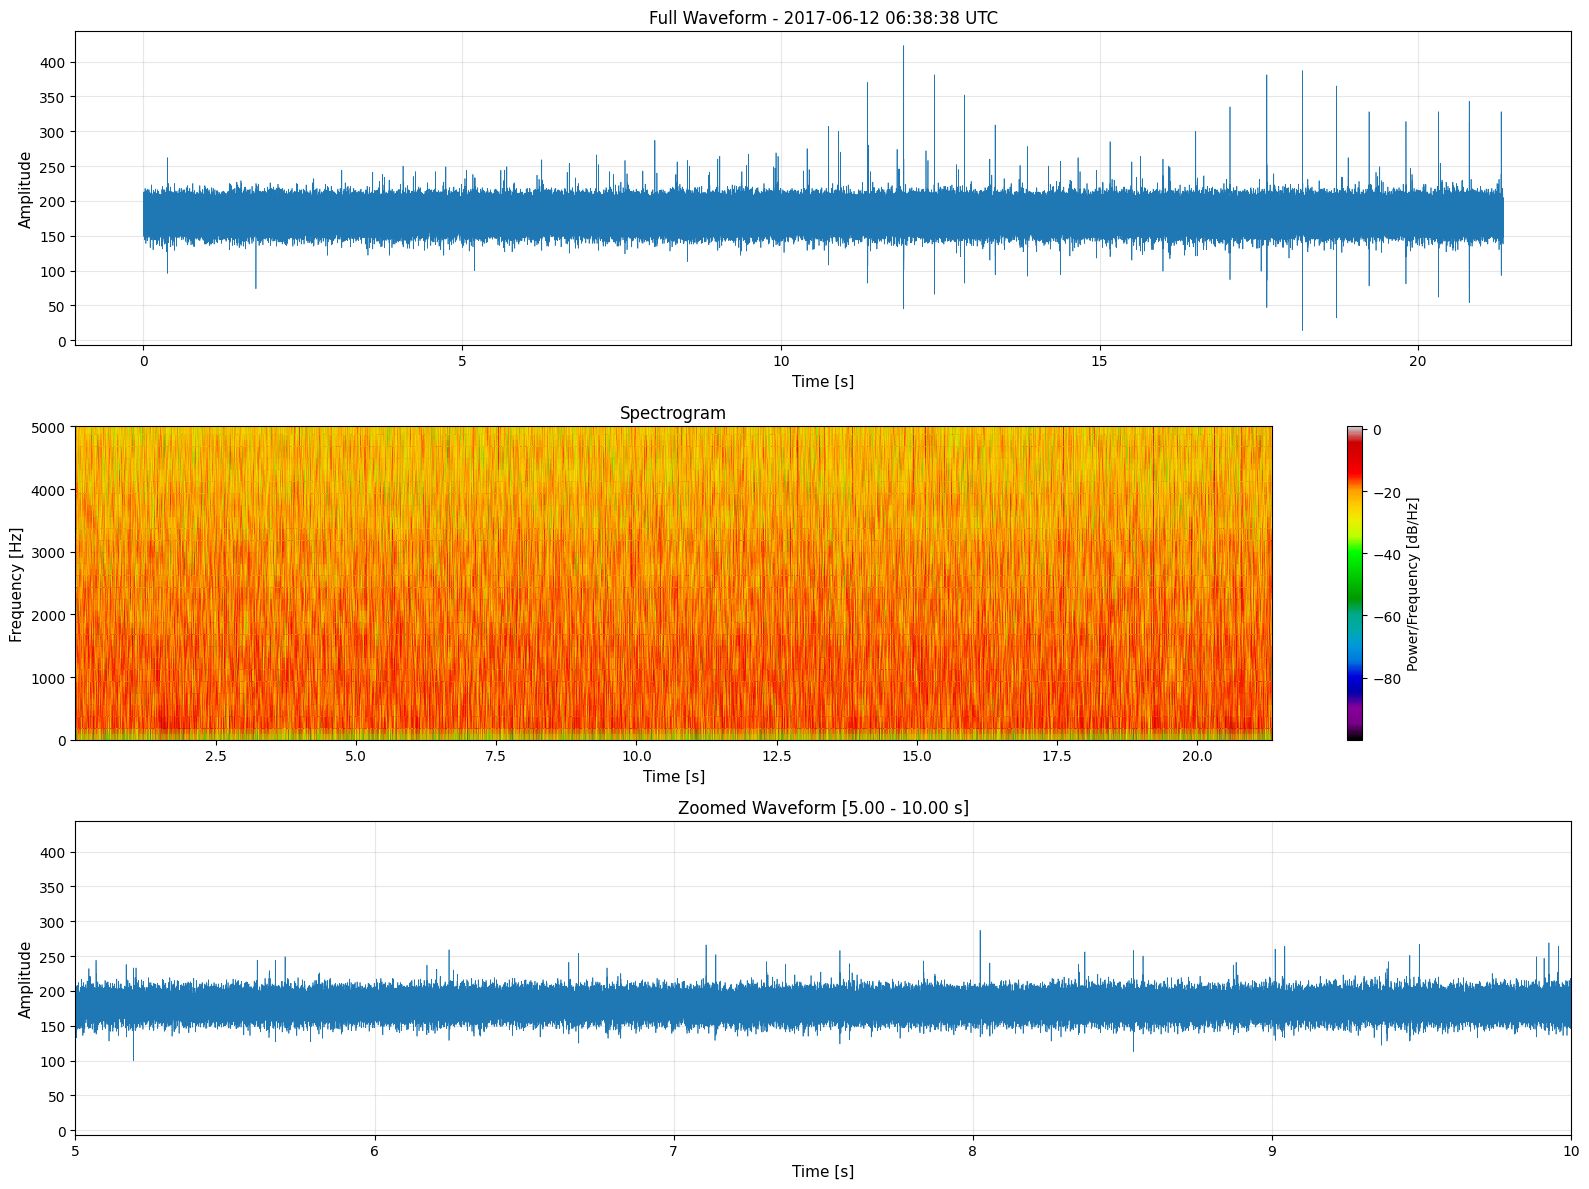

In [5]:
# Create a comprehensive overview plot
ears_reader.plot_overview(data, fmax=5000, xlim_zoom=(5, 10))

## Example 3: Analyzing a Different File (.130)

In [ ]:
# Read and analyze the .130 file
file_path_2 = Path('fourier_examples/data/7164403B.130')
data_2 = ears_reader.read_ears_file(file_path_2)

ears_reader.print_file_info(data_2, file_path_2)

In [ ]:
# Create overview for the second file
ears_reader.plot_overview(data_2, fmax=10000, xlim_zoom=(6, 8))

## Example 4: Zooming into Specific Time Windows

In [ ]:
# Plot a zoomed waveform section
ears_reader.plot_waveform(data, xlim=(8, 12))

## Example 5: Custom Spectrogram Parameters

In [ ]:
# Higher resolution spectrogram with more FFT points
ears_reader.plot_spectrogram(
    data, 
    fmax=8000, 
    nperseg=2048,  # Longer FFT window for better frequency resolution
    noverlap=1536,  # More overlap for smoother time resolution
    cmap='viridis'  # Different colormap
)

## Example 6: Working with Normalized Data

In [ ]:
# Read file with normalization
data_normalized = ears_reader.read_ears_file(file_path, normalize=True)

print("Normalized data statistics:")
import numpy as np
print(f"Mean: {np.mean(data_normalized['data']):.6f}")
print(f"Std Dev: {np.std(data_normalized['data']):.6f}")
print(f"Min: {np.min(data_normalized['data']):.6f}")
print(f"Max: {np.max(data_normalized['data']):.6f}")

In [ ]:
# Plot normalized data
ears_reader.plot_waveform(data_normalized)

## Accessing Raw Data

You can access the raw data for custom analysis:

In [ ]:
# Access the data dictionary contents
print("Available keys in data dictionary:")
for key, value in data.items():
    if key == 'data':
        print(f"  {key}: numpy array with shape {value.shape}")
    elif key == 'timestamps':
        print(f"  {key}: list with {len(value)} timestamps")
    else:
        print(f"  {key}: {value}")

In [ ]:
# Example custom analysis: compute basic statistics
import numpy as np

acoustic_data = data['data']
print("Acoustic Data Statistics:")
print(f"  Mean amplitude: {np.mean(acoustic_data):.2f}")
print(f"  Std deviation: {np.std(acoustic_data):.2f}")
print(f"  RMS: {np.sqrt(np.mean(acoustic_data**2)):.2f}")
print(f"  Peak amplitude: {np.max(np.abs(acoustic_data)):.2f}")